# Sanity Check - Healthy Population

This notebook loads and explores the following datasets:
1. **date_blood_taken_dates.csv** - Blood sample collection dates
2. **data_hesin_dates_fixed.csv** - Hospital episode statistics with fixed dates
3. **count_biochemistry_data.csv** - Biochemistry measurements


In [1]:
import pandas as pd
import os

# Base paths
DATA_PATH = "../../data"
DATA_DATES_PATH = os.path.join(DATA_PATH, "data_dates")
DATA_HESIN_PATH = os.path.join(DATA_PATH, "data_hesin")
DATA_UKB_PATH = os.path.join(DATA_PATH, "data_ukb")


In [2]:
# Load date_blood_taken_dates.csv
date_blood_taken_df = pd.read_csv(os.path.join(DATA_DATES_PATH, "date_blood_taken_dates.csv"))
print(f"Date Blood Taken shape: {date_blood_taken_df.shape}")
date_blood_taken_df.head()


Date Blood Taken shape: (501936, 2)


,Participant ID,Time blood sample collected | Instance 0 | Array 0
0,1000020,2009-01-07T12:30:15
1,1000107,2008-09-01T12:44:37
2,1000161,2009-06-22T12:18:25
3,1000172,2008-07-12T14:42:16
4,1000199,2010-05-13T19:34:01


In [3]:
# Load data_hesin_dates_fixed.csv
data_hesin_dates_df = pd.read_csv(os.path.join(DATA_HESIN_PATH, "data_hesin_dates_fixed.csv"))
print(f"HESIN Dates Fixed shape: {data_hesin_dates_df.shape}")
data_hesin_dates_df.head()


HESIN Dates Fixed shape: (17495611, 4)


,dnx_hesin_diag_id,eid,diag_icd10,event_date
0,1000018-1-0,1000018,L72.9 Follicular cyst of skin and subcutaneous...,2000-05-09
1,1000018-0-0,1000018,"C50.9 Breast, unspecified",2007-04-26
2,1000018-0-1,1000018,"E04.9 Non-toxic goitre, unspecified",2007-04-26
3,1000020-1-0,1000020,L03.1 Cellulitis of other parts of limb,2002-03-30
4,1000020-0-0,1000020,K40.9 Unilateral or unspecified inguinal herni...,2004-03-22


In [4]:
# Load count_biochemistry_data.csv
biochemistry_df = pd.read_csv(os.path.join(DATA_UKB_PATH, "count_biochemistry_data.csv"))
print(f"Biochemistry Data shape: {biochemistry_df.shape}")
biochemistry_df.head()


Biochemistry Data shape: (501936, 45)


,Participant ID,Basophill count | Instance 0,Eosinophill count | Instance 0,Haematocrit percentage | Instance 0,Haemoglobin concentration | Instance 0,Lymphocyte count | Instance 0,Mean corpuscular volume | Instance 0,Mean platelet (thrombocyte) volume | Instance 0,Monocyte count | Instance 0,Neutrophill count | Instance 0,...,Phosphate | Instance 0,Rheumatoid factor | Instance 0,SHBG | Instance 0,Testosterone | Instance 0,Total bilirubin | Instance 0,Total protein | Instance 0,Triglycerides | Instance 0,Urate | Instance 0,Urea | Instance 0,Vitamin D | Instance 0
0,3700295,0.00,0.10,40.50,13.80,1.60,89.20,8.80,0.40,4.80,...,1.101,NaN,51.13,NaN,10.54,73.20,1.325,253.9,4.89,43.5
1,3748523,0.03,0.40,44.58,15.53,1.84,90.02,9.89,0.43,4.54,...,NaN,NaN,NaN,11.387,8.85,NaN,3.903,319.1,4.60,34.9
2,4848142,0.10,0.40,42.50,15.50,2.20,95.90,8.80,0.70,6.90,...,0.985,NaN,43.97,11.043,4.80,67.97,4.649,326.3,5.22,19.9
3,6000577,0.05,0.15,43.69,15.87,2.12,87.64,11.10,0.42,5.00,...,0.831,NaN,24.83,10.330,25.14,75.30,3.312,443.3,4.90,25.5
4,3336283,0.04,0.06,39.39,13.50,1.44,93.77,10.31,0.36,2.59,...,1.225,NaN,62.62,1.662,16.18,71.13,1.709,193.3,5.93,53.1


## Define Healthy Population

Two approaches to define healthy patients:
1. **Approach 1**: Patients in biochemistry data but NOT in HESIN (no hospital records at all)
2. **Approach 2**: Patients where blood sample was taken BEFORE their first hospital record

Final output: Biochemistry data for all healthy patients with a column indicating the approach used.


In [5]:
# Approach 1: Patients in biochemistry data but NOT in HESIN (no hospital records)

# Get distinct patient IDs from each dataset
biochemistry_patients = set(biochemistry_df["Participant ID"].unique())
hesin_patients = set(data_hesin_dates_df["eid"].unique())

# Patients in biochemistry but not in hesin
approach1_patients = biochemistry_patients - hesin_patients

print(f"Total unique patients in biochemistry data: {len(biochemistry_patients)}")
print(f"Total unique patients in HESIN data: {len(hesin_patients)}")
print(f"Approach 1 - Patients with no hospital records: {len(approach1_patients)}")


Total unique patients in biochemistry data: 501936
Total unique patients in HESIN data: 448729
Approach 1 - Patients with no hospital records: 53207


In [6]:
# Approach 2: Patients where blood sample date is BEFORE their first hospital record

# Parse dates (use errors='coerce' to handle invalid values like "Not performed")
date_blood_taken_df["blood_date"] = pd.to_datetime(
    date_blood_taken_df["Time blood sample collected | Instance 0 | Array 0"],
    errors='coerce'
)
data_hesin_dates_df["event_date_parsed"] = pd.to_datetime(
    data_hesin_dates_df["event_date"],
    errors='coerce'
)

# Check how many invalid blood dates we have
invalid_blood_dates = date_blood_taken_df["blood_date"].isna().sum()
print(f"Patients with invalid/missing blood dates: {invalid_blood_dates}")

# Get the first (earliest) hospital record date for each patient
first_hesin_date = data_hesin_dates_df.groupby("eid")["event_date_parsed"].min().reset_index()
first_hesin_date.columns = ["Participant ID", "first_hospital_date"]

print(f"Patients with hospital records: {len(first_hesin_date)}")
first_hesin_date.head()


Patients with invalid/missing blood dates: 5114
Patients with hospital records: 448729


,Participant ID,first_hospital_date
0,1000018,2000-05-09
1,1000020,2002-03-30
2,1000037,2005-04-07
3,1000043,1999-12-07
4,1000066,2018-04-04


In [7]:
# Merge blood dates with first hospital dates
# Filter out patients with invalid blood dates first
valid_blood_dates = date_blood_taken_df[date_blood_taken_df["blood_date"].notna()]

blood_with_hospital = valid_blood_dates[["Participant ID", "blood_date"]].merge(
    first_hesin_date,
    on="Participant ID",
    how="inner"  # Only patients that appear in both datasets
)

# Find patients where blood was taken BEFORE first hospital visit
blood_before_hospital = blood_with_hospital[
    blood_with_hospital["blood_date"] < blood_with_hospital["first_hospital_date"]
]

approach2_patients = set(blood_before_hospital["Participant ID"].unique())

# Exclude patients already in approach 1 (they have no hospital records, so can't be in approach 2)
# But approach 2 requires them to be in hesin, so there's no overlap by definition
print(f"Approach 2 - Patients with blood sample before first hospital visit: {len(approach2_patients)}")


Approach 2 - Patients with blood sample before first hospital visit: 131234


In [8]:
# Combine both approaches - ensuring no duplicates
# Note: By definition there's no overlap since:
#   - Approach 1: patients NOT in HESIN
#   - Approach 2: patients IN HESIN but blood taken before first hospital visit

# Verify no overlap
overlap = approach1_patients & approach2_patients
print(f"Overlap between approaches (should be 0): {len(overlap)}")

# Total healthy patients
all_healthy_patients = approach1_patients | approach2_patients
print(f"Total healthy patients: {len(all_healthy_patients)}")


Overlap between approaches (should be 0): 0
Total healthy patients: 184441


In [9]:
# Create the final healthy population dataframe with approach indicator

# Create approach mapping for each patient
approach_mapping = {}
for patient_id in approach1_patients:
    approach_mapping[patient_id] = "no_hospital_records"
for patient_id in approach2_patients:
    approach_mapping[patient_id] = "blood_before_hospital"

# Filter biochemistry data to only healthy patients and add approach column
healthy_biochemistry_df = biochemistry_df[
    biochemistry_df["Participant ID"].isin(all_healthy_patients)
].copy()

healthy_biochemistry_df["healthy_approach"] = healthy_biochemistry_df["Participant ID"].map(approach_mapping)

# Add blood_date and first_hospital_date for patients with "blood_before_hospital" approach
# Create a date mapping from blood_before_hospital dataframe
date_info = blood_before_hospital[["Participant ID", "blood_date", "first_hospital_date"]].copy()
date_info = date_info.drop_duplicates(subset=["Participant ID"])

# Merge date info into the healthy dataframe
healthy_biochemistry_df = healthy_biochemistry_df.merge(
    date_info,
    on="Participant ID",
    how="left"
)

print(f"Final healthy population biochemistry data shape: {healthy_biochemistry_df.shape}")
print(f"\nApproach distribution:")
print(healthy_biochemistry_df["healthy_approach"].value_counts())
print(f"\nPatients with date info (blood_before_hospital): {healthy_biochemistry_df['blood_date'].notna().sum()}")
healthy_biochemistry_df.head()


Final healthy population biochemistry data shape: (184441, 48)

Approach distribution:
healthy_approach
blood_before_hospital    131234
no_hospital_records       53207
Name: count, dtype: int64

Patients with date info (blood_before_hospital): 131234


,Participant ID,Basophill count | Instance 0,Eosinophill count | Instance 0,Haematocrit percentage | Instance 0,Haemoglobin concentration | Instance 0,Lymphocyte count | Instance 0,Mean corpuscular volume | Instance 0,Mean platelet (thrombocyte) volume | Instance 0,Monocyte count | Instance 0,Neutrophill count | Instance 0,...,Testosterone | Instance 0,Total bilirubin | Instance 0,Total protein | Instance 0,Triglycerides | Instance 0,Urate | Instance 0,Urea | Instance 0,Vitamin D | Instance 0,healthy_approach,blood_date,first_hospital_date
0,3748523,0.03,0.40,44.58,15.53,1.84,90.02,9.89,0.43,4.54,...,11.387,8.85,NaN,3.903,319.1,4.60,34.9,blood_before_hospital,2009-08-08 12:21:16,2010-09-11
1,3336283,0.04,0.06,39.39,13.50,1.44,93.77,10.31,0.36,2.59,...,1.662,16.18,71.13,1.709,193.3,5.93,53.1,blood_before_hospital,2010-07-02 13:05:09,2012-06-08
2,2871954,0.02,0.09,36.36,12.52,1.52,93.37,9.85,0.59,4.46,...,0.694,8.69,72.43,1.006,216.1,4.60,26.2,blood_before_hospital,2008-09-27 13:50:01,2009-12-01
3,4944224,0.03,0.11,40.01,13.55,2.39,88.06,9.96,0.40,4.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no_hospital_records,NaT,NaT
4,4939992,0.01,0.09,40.33,13.35,2.20,92.95,8.53,0.42,2.82,...,4.166,9.99,73.20,1.442,365.8,4.63,51.9,blood_before_hospital,2010-06-04 12:04:52,2010-07-21


In [10]:
# Summary statistics
print("=" * 60)
print("HEALTHY POPULATION SUMMARY")
print("=" * 60)
print(f"Total patients in biochemistry data: {len(biochemistry_patients)}")
print(f"Total patients in HESIN data: {len(hesin_patients)}")
print("-" * 60)
print(f"Approach 1 (no hospital records): {len(approach1_patients)} patients")
print(f"Approach 2 (blood before hospital): {len(approach2_patients)} patients")
print("-" * 60)
print(f"Total healthy patients: {len(all_healthy_patients)}")
print(f"Percentage of biochemistry patients considered healthy: {100 * len(all_healthy_patients) / len(biochemistry_patients):.2f}%")
print("=" * 60)


HEALTHY POPULATION SUMMARY
Total patients in biochemistry data: 501936
Total patients in HESIN data: 448729
------------------------------------------------------------
Approach 1 (no hospital records): 53207 patients
Approach 2 (blood before hospital): 131234 patients
------------------------------------------------------------
Total healthy patients: 184441
Percentage of biochemistry patients considered healthy: 36.75%


## PCA Analysis on Healthy Population

Perform Principal Component Analysis on the biochemistry features of the healthy population.


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Get only the numerical biochemistry features (exclude ID, approach, and date columns)
non_feature_cols = ["Participant ID", "healthy_approach", "blood_date", "first_hospital_date"]
feature_cols = [col for col in healthy_biochemistry_df.columns if col not in non_feature_cols]

print(f"Number of biochemistry features: {len(feature_cols)}")
print(f"Features: {feature_cols[:10]}...")  # Show first 10


Number of biochemistry features: 44
Features: ['Basophill count | Instance 0', 'Eosinophill count | Instance 0', 'Haematocrit percentage | Instance 0', 'Haemoglobin concentration | Instance 0', 'Lymphocyte count | Instance 0', 'Mean corpuscular volume | Instance 0', 'Mean platelet (thrombocyte) volume | Instance 0', 'Monocyte count | Instance 0', 'Neutrophill count | Instance 0', 'Nucleated red blood cell count | Instance 0']...


In [12]:
# Prepare data for PCA
X = healthy_biochemistry_df[feature_cols].copy()

# Check missing values
missing_per_col = X.isna().sum()
missing_per_row = X.isna().sum(axis=1)

print(f"Missing values per column (top 10):")
print(missing_per_col.sort_values(ascending=False).head(10))
print(f"\nRows with any missing values: {(missing_per_row > 0).sum()}")
print(f"Rows with complete data: {(missing_per_row == 0).sum()}")


Missing values per column (top 10):
Rheumatoid factor | Instance 0    169727
Oestradiol | Instance 0           157071
Lipoprotein A | Instance 0         44789
Direct bilirubin | Instance 0      35520
SHBG | Instance 0                  26757
Apolipoprotein A | Instance 0      26222
Phosphate | Instance 0             25638
Total protein | Instance 0         25488
Glucose | Instance 0               25477
HDL cholesterol | Instance 0       25348
dtype: int64

Rows with any missing values: 183356
Rows with complete data: 1085


In [13]:
# Handle missing values: impute with median to keep ALL patients
from sklearn.impute import SimpleImputer

# Impute missing values with median (robust to outliers)
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

print(f"Total samples after imputation: {len(X_imputed):,} (100% - all patients kept)")

# Standardize features (zero mean, unit variance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

print(f"Scaled data shape: {X_scaled.shape}")


Total samples after imputation: 184,441 (100% - all patients kept)
Scaled data shape: (184441, 44)


In [14]:
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

print(f"Number of components: {len(explained_variance_ratio)}")
print(f"\nExplained variance ratio (first 10 components):")
for i in range(min(10, len(explained_variance_ratio))):
    print(f"  PC{i+1}: {explained_variance_ratio[i]:.4f} ({cumulative_variance[i]:.4f} cumulative)")

# Find number of components for 90% and 95% variance
n_90 = np.argmax(cumulative_variance >= 0.90) + 1
n_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nComponents needed for 90% variance: {n_90}")
print(f"Components needed for 95% variance: {n_95}")


Number of components: 44

Explained variance ratio (first 10 components):
  PC1: 0.1274 (0.1274 cumulative)
  PC2: 0.0782 (0.2055 cumulative)
  PC3: 0.0676 (0.2732 cumulative)
  PC4: 0.0508 (0.3240 cumulative)
  PC5: 0.0467 (0.3706 cumulative)
  PC6: 0.0385 (0.4091 cumulative)
  PC7: 0.0382 (0.4473 cumulative)
  PC8: 0.0324 (0.4797 cumulative)
  PC9: 0.0318 (0.5114 cumulative)
  PC10: 0.0306 (0.5420 cumulative)

Components needed for 90% variance: 28
Components needed for 95% variance: 32


## Feature Augmentation with Pearson Correlation

Create augmented features based on pairs of features that show strong correlations across the **entire healthy population**.

We identify feature pairs with high absolute correlation values and create augmented features that capture their joint behavior (e.g., residuals, z-score products, Mahalanobis distances).


In [15]:
# Calculate correlations on the ENTIRE healthy population (not separated by subgroup)
print(f"Calculating correlations on entire healthy population: {len(healthy_biochemistry_df):,} patients")

# Calculate correlation matrix for the entire population
corr_all = healthy_biochemistry_df[feature_cols].corr(method='pearson')

# Find pairs with meaningful correlation (absolute value threshold)
MIN_CORRELATION_THRESHOLD = 0.3
pairs = []
for i in range(len(feature_cols)):
    for j in range(i + 1, len(feature_cols)):
        feat1, feat2 = feature_cols[i], feature_cols[j]
        corr_val = corr_all.iloc[i, j]
        if not np.isnan(corr_val) and abs(corr_val) >= MIN_CORRELATION_THRESHOLD:
            pairs.append({
                'Feature 1': feat1, 
                'Feature 2': feat2, 
                'Correlation': corr_val,
                'Abs Correlation': abs(corr_val)
            })

pairs_df = pd.DataFrame(pairs).sort_values('Abs Correlation', ascending=False)
print(f"\nFound {len(pairs_df)} pairs with |correlation| >= {MIN_CORRELATION_THRESHOLD}")
print(f"\nTop 10 pairs with highest absolute correlation:")
print(pairs_df[['Feature 1', 'Feature 2', 'Correlation']].head(10).to_string(index=False))


Calculating correlations on entire healthy population: 184,441 patients

Found 57 pairs with |correlation| >= 0.3

Top 10 pairs with highest absolute correlation:
                             Feature 1                                       Feature 2  Correlation
         Apolipoprotein B | Instance 0                         LDL direct | Instance 0     0.957698
              Cholesterol | Instance 0                         LDL direct | Instance 0     0.948816
   Haematocrit percentage | Instance 0          Haemoglobin concentration | Instance 0     0.944289
         Apolipoprotein A | Instance 0                    HDL cholesterol | Instance 0     0.922094
         Direct bilirubin | Instance 0                    Total bilirubin | Instance 0     0.916856
         Apolipoprotein B | Instance 0                        Cholesterol | Instance 0     0.881713
   Haematocrit percentage | Instance 0 Red blood cell (erythrocyte) count | Instance 0     0.841807
        Neutrophill count | Instance 

In [16]:
# Create augmented features from top correlated pairs (9 methods - no Fisher since no group separation)
from sklearn.linear_model import LinearRegression

N_TOP_PAIRS = 10
top_pairs = pairs_df.sort_values('Abs Correlation', ascending=False).head(N_TOP_PAIRS)

df_enhanced = healthy_biochemistry_df.copy()
new_feature_names = []

# Use ENTIRE population for statistics (no group separation)
print(f"Creating augmented features from top {N_TOP_PAIRS} correlated pairs...\n")
print(f"Using entire population ({len(df_enhanced):,} patients) for statistics\n")
print("Methods:")
print("  1.  RESID:   Deviation from population regression line")
print("  2.  ZDIFF:   Z-score difference (captures directional imbalance)")
print("  3.  ZPROD:   Z-score product (both abnormal in same direction = high signal)")
print("  4.  MAHAL:   Mahalanobis-like distance from population centroid")
print("  5.  CDEV:    Covariance deviation (break from population correlation pattern)")
print("  6.  QEXTR:   Quantile extremity (how far from population median)")
print("  7.  DEVPROD: Product of absolute deviations (both abnormal = high)")
print("  8.  ASYM:    Asymmetry score (which feature deviates more)")
print("  9.  DENS:    Density anomaly score (distance from population center)")
print("=" * 80 + "\n")

for idx, row in top_pairs.iterrows():
    feat1 = row['Feature 1']
    feat2 = row['Feature 2']
    
    f1_short = feat1.replace(' | Instance 0', '').replace(' | Instance 1', '')[:20]
    f2_short = feat2.replace(' | Instance 0', '').replace(' | Instance 1', '')[:20]
    
    x1 = df_enhanced[feat1].values
    x2 = df_enhanced[feat2].values
    
    # Use entire population statistics
    mean1 = np.nanmean(x1)
    std1 = np.nanstd(x1)
    mean2 = np.nanmean(x2)
    std2 = np.nanstd(x2)
    
    # Skip if invalid statistics
    if std1 == 0 or std2 == 0 or np.isnan(std1) or np.isnan(std2):
        continue
    
    # Z-scores relative to entire population
    z1 = (x1 - mean1) / std1
    z2 = (x2 - mean2) / std2
    
    # ==================== METHOD 1: RESIDUAL ====================
    valid_mask = ~(np.isnan(x1) | np.isnan(x2))
    
    if valid_mask.sum() > 10:
        reg = LinearRegression()
        reg.fit(x2[valid_mask].reshape(-1, 1), x1[valid_mask].reshape(-1, 1))
        
        residual = np.full(len(df_enhanced), np.nan)
        
        if valid_mask.sum() > 0:
            predicted = reg.predict(x2[valid_mask].reshape(-1, 1)).flatten()
            residual[valid_mask] = x1[valid_mask] - predicted
        
        df_enhanced[f"RESID_{f1_short}_from_{f2_short}"] = residual
        new_feature_names.append(f"RESID_{f1_short}_from_{f2_short}")
    
    # ==================== METHOD 2: Z-SCORE DIFFERENCE ====================
    df_enhanced[f"ZDIFF_{f1_short}_vs_{f2_short}"] = z1 - z2
    new_feature_names.append(f"ZDIFF_{f1_short}_vs_{f2_short}")
    
    # ==================== METHOD 3: Z-SCORE PRODUCT ====================
    df_enhanced[f"ZPROD_{f1_short}_x_{f2_short}"] = z1 * z2
    new_feature_names.append(f"ZPROD_{f1_short}_x_{f2_short}")
    
    # ==================== METHOD 4: MAHALANOBIS-LIKE DISTANCE ====================
    valid_both = ~(np.isnan(x1) | np.isnan(x2))
    if valid_both.sum() > 10:
        cov_pop = np.cov(x1[valid_both], x2[valid_both])
        if np.linalg.det(cov_pop) > 1e-10:
            cov_inv = np.linalg.inv(cov_pop)
            mahal = np.full(len(df_enhanced), np.nan)
            
            for i in np.where(valid_both)[0]:
                diff = np.array([x1[i] - mean1, x2[i] - mean2])
                mahal[i] = np.sqrt(diff @ cov_inv @ diff)
            
            df_enhanced[f"MAHAL_{f1_short}_vs_{f2_short}"] = mahal
            new_feature_names.append(f"MAHAL_{f1_short}_vs_{f2_short}")
    
    # ==================== METHOD 5: COVARIANCE DEVIATION ====================
    valid_both = ~(np.isnan(x1) | np.isnan(x2))
    if valid_both.sum() > 10:
        expected_cov = np.cov(x1[valid_both], x2[valid_both])[0, 1]
        observed_cov = (x1 - mean1) * (x2 - mean2)
        cov_std = np.nanstd((x1 - mean1) * (x2 - mean2))
        if cov_std > 0:
            cov_dev = (observed_cov - expected_cov) / cov_std
            df_enhanced[f"CDEV_{f1_short}_vs_{f2_short}"] = cov_dev
            new_feature_names.append(f"CDEV_{f1_short}_vs_{f2_short}")
    
    # ==================== METHOD 6: QUANTILE EXTREMITY ====================
    med1 = np.nanmedian(x1)
    med2 = np.nanmedian(x2)
    iqr1 = np.nanpercentile(x1, 75) - np.nanpercentile(x1, 25)
    iqr2 = np.nanpercentile(x2, 75) - np.nanpercentile(x2, 25)
    
    if iqr1 > 0 and iqr2 > 0:
        q1 = np.abs(x1 - med1) / iqr1
        q2 = np.abs(x2 - med2) / iqr2
        df_enhanced[f"QEXTR_{f1_short}_vs_{f2_short}"] = np.maximum(q1, q2)
        new_feature_names.append(f"QEXTR_{f1_short}_vs_{f2_short}")
    
    # ==================== METHOD 7: DEVIATION PRODUCT ====================
    abs_dev1 = np.abs(z1)
    abs_dev2 = np.abs(z2)
    df_enhanced[f"DEVPROD_{f1_short}_x_{f2_short}"] = abs_dev1 * abs_dev2
    new_feature_names.append(f"DEVPROD_{f1_short}_x_{f2_short}")
    
    # ==================== METHOD 8: ASYMMETRY SCORE ====================
    df_enhanced[f"ASYM_{f1_short}_vs_{f2_short}"] = np.abs(z1) - np.abs(z2)
    new_feature_names.append(f"ASYM_{f1_short}_vs_{f2_short}")
    
    # ==================== METHOD 9: DENSITY ANOMALY ====================
    dist_from_center = np.sqrt(z1**2 + z2**2)
    valid_z = ~(np.isnan(z1) | np.isnan(z2))
    if valid_z.sum() > 10:
        typical_dist = np.nanmedian(np.sqrt(z1[valid_z]**2 + z2[valid_z]**2))
        if typical_dist > 0:
            df_enhanced[f"DENS_{f1_short}_vs_{f2_short}"] = dist_from_center / typical_dist
            new_feature_names.append(f"DENS_{f1_short}_vs_{f2_short}")

# Summary
print("=" * 80)
print("FEATURE AUGMENTATION COMPLETE")
print("=" * 80)
print(f"Original features: {len(feature_cols)}")
print(f"New augmented features: {len(new_feature_names)}")
print(f"Total features: {len(feature_cols) + len(new_feature_names)}")

feature_types = {
    'RESID': 'Residual (regression deviation)',
    'ZDIFF': 'Z-score Difference',
    'ZPROD': 'Z-score Product (interaction)',
    'MAHAL': 'Mahalanobis Distance',
    'CDEV': 'Covariance Deviation',
    'QEXTR': 'Quantile Extremity',
    'DEVPROD': 'Deviation Product',
    'ASYM': 'Asymmetry Score',
    'DENS': 'Density Anomaly'
}

print("\nBreakdown by method:")
for prefix, name in feature_types.items():
    count = len([f for f in new_feature_names if f.startswith(prefix)])
    if count > 0:
        print(f"  - {name} ({prefix}): {count}")


Creating augmented features from top 10 correlated pairs...

Using entire population (184,441 patients) for statistics

Methods:
  1.  RESID:   Deviation from population regression line
  2.  ZDIFF:   Z-score difference (captures directional imbalance)
  3.  ZPROD:   Z-score product (both abnormal in same direction = high signal)
  4.  MAHAL:   Mahalanobis-like distance from population centroid
  5.  CDEV:    Covariance deviation (break from population correlation pattern)
  6.  QEXTR:   Quantile extremity (how far from population median)
  7.  DEVPROD: Product of absolute deviations (both abnormal = high)
  8.  ASYM:    Asymmetry score (which feature deviates more)
  9.  DENS:    Density anomaly score (distance from population center)

FEATURE AUGMENTATION COMPLETE
Original features: 44
New augmented features: 90
Total features: 134

Breakdown by method:
  - Residual (regression deviation) (RESID): 10
  - Z-score Difference (ZDIFF): 10
  - Z-score Product (interaction) (ZPROD): 10
  -

## PCA on Augmented Features

Perform PCA on the combined original + augmented features to see how the feature augmentation affects the representation.


In [17]:
# Prepare augmented data for PCA
all_features = feature_cols + new_feature_names
X_augmented = df_enhanced[all_features].copy()

print(f"Total features for PCA: {len(all_features)}")
print(f"  - Original features: {len(feature_cols)}")
print(f"  - Augmented features: {len(new_feature_names)}")

# Check missing values
missing_per_col_aug = X_augmented.isna().sum()
missing_per_row_aug = X_augmented.isna().sum(axis=1)

print(f"\nMissing values per column (top 10 augmented):")
augmented_missing = missing_per_col_aug[new_feature_names].sort_values(ascending=False)
print(augmented_missing.head(10))
print(f"\nRows with any missing values: {(missing_per_row_aug > 0).sum()}")


Total features for PCA: 134
  - Original features: 44
  - Augmented features: 90

Missing values per column (top 10 augmented):
RESID_Direct bilirubin_from_Total bilirubin    35643
DENS_Direct bilirubin_vs_Total bilirubin       35643
ASYM_Direct bilirubin_vs_Total bilirubin       35643
DEVPROD_Direct bilirubin_x_Total bilirubin     35643
QEXTR_Direct bilirubin_vs_Total bilirubin      35643
CDEV_Direct bilirubin_vs_Total bilirubin       35643
MAHAL_Direct bilirubin_vs_Total bilirubin      35643
ZPROD_Direct bilirubin_x_Total bilirubin       35643
ZDIFF_Direct bilirubin_vs_Total bilirubin      35643
ASYM_Apolipoprotein A_vs_HDL cholesterol       26272
dtype: int64

Rows with any missing values: 183356


In [18]:
# Impute missing values and scale for augmented features
imputer_aug = SimpleImputer(strategy='median')
X_augmented_imputed = imputer_aug.fit_transform(X_augmented)

print(f"Total samples after imputation: {len(X_augmented_imputed):,}")

# Standardize features
scaler_aug = StandardScaler()
X_augmented_scaled = scaler_aug.fit_transform(X_augmented_imputed)

print(f"Scaled augmented data shape: {X_augmented_scaled.shape}")


Total samples after imputation: 184,441
Scaled augmented data shape: (184441, 134)


In [19]:
# Perform PCA on augmented features
pca_aug = PCA()
X_pca_aug = pca_aug.fit_transform(X_augmented_scaled)

# Explained variance
explained_variance_ratio_aug = pca_aug.explained_variance_ratio_
cumulative_variance_aug = np.cumsum(explained_variance_ratio_aug)

print(f"Number of components: {len(explained_variance_ratio_aug)}")
print(f"\nExplained variance ratio (first 10 components):")
for i in range(min(10, len(explained_variance_ratio_aug))):
    print(f"  PC{i+1}: {explained_variance_ratio_aug[i]:.4f} ({cumulative_variance_aug[i]:.4f} cumulative)")

# Find number of components for 90% and 95% variance
n_90_aug = np.argmax(cumulative_variance_aug >= 0.90) + 1
n_95_aug = np.argmax(cumulative_variance_aug >= 0.95) + 1
print(f"\nComponents needed for 90% variance: {n_90_aug}")
print(f"Components needed for 95% variance: {n_95_aug}")

# Compare with original PCA
print(f"\n--- Comparison with Original PCA ---")
print(f"Original: 90% variance with {n_90} components, 95% with {n_95} components")
print(f"Augmented: 90% variance with {n_90_aug} components, 95% with {n_95_aug} components")


Number of components: 134

Explained variance ratio (first 10 components):
  PC1: 0.1177 (0.1177 cumulative)
  PC2: 0.1085 (0.2262 cumulative)
  PC3: 0.0689 (0.2951 cumulative)
  PC4: 0.0543 (0.3494 cumulative)
  PC5: 0.0486 (0.3981 cumulative)
  PC6: 0.0440 (0.4420 cumulative)
  PC7: 0.0393 (0.4813 cumulative)
  PC8: 0.0346 (0.5159 cumulative)
  PC9: 0.0296 (0.5456 cumulative)
  PC10: 0.0238 (0.5693 cumulative)

Components needed for 90% variance: 41
Components needed for 95% variance: 51

--- Comparison with Original PCA ---
Original: 90% variance with 28 components, 95% with 32 components
Augmented: 90% variance with 41 components, 95% with 51 components


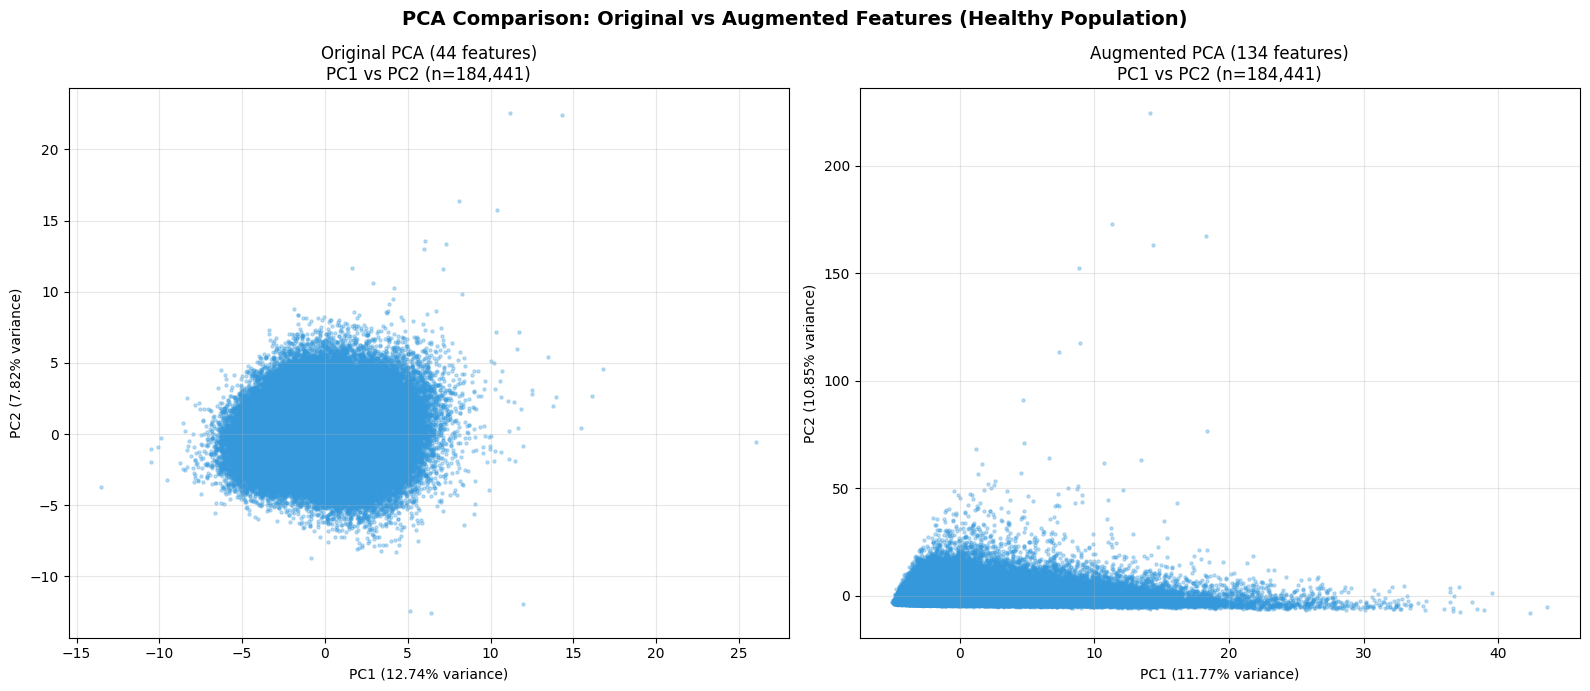

In [20]:
# Create side-by-side comparison: Original PCA vs Augmented PCA
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Plot 1: Original PCA (without augmentation) - entire healthy population as one group
ax1 = axes[0]
ax1.scatter(X_pca[:, 0], X_pca[:, 1], c='#3498db', alpha=0.3, s=5)
ax1.set_xlabel(f'PC1 ({explained_variance_ratio[0]:.2%} variance)')
ax1.set_ylabel(f'PC2 ({explained_variance_ratio[1]:.2%} variance)')
ax1.set_title(f'Original PCA ({len(feature_cols)} features)\nPC1 vs PC2 (n={len(X_pca):,})')
ax1.grid(True, alpha=0.3)

# Plot 2: Augmented PCA - entire healthy population as one group
ax2 = axes[1]
ax2.scatter(X_pca_aug[:, 0], X_pca_aug[:, 1], c='#3498db', alpha=0.3, s=5)
ax2.set_xlabel(f'PC1 ({explained_variance_ratio_aug[0]:.2%} variance)')
ax2.set_ylabel(f'PC2 ({explained_variance_ratio_aug[1]:.2%} variance)')
ax2.set_title(f'Augmented PCA ({len(all_features)} features)\nPC1 vs PC2 (n={len(X_pca_aug):,})')
ax2.grid(True, alpha=0.3)

plt.suptitle('PCA Comparison: Original vs Augmented Features (Healthy Population)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


## Inner vs Outer Circle Analysis

Analysis of disease patterns for patients in the center vs periphery of the PCA distribution.
- **Inner circle**: ≤25th percentile distance from center
- **Outer circle**: ≥75th percentile distance from center
- **ICD-10 codes**: A-N only (excluding O-Z: pregnancy, external causes, health factors)


In [21]:
# Calculate PCA distance from center and define inner/outer groups
# ICD-10 letters to include (A-N only, excluding O-Z)
INCLUDED_ICD10_LETTERS = list('ABCDEFGHIJKLMN')
INNER_PERCENTILE = 25
OUTER_PERCENTILE = 75

# Calculate Euclidean distance from center (0, 0) for PC1 and PC2
distances = np.sqrt(X_pca[:, 0]**2 + X_pca[:, 1]**2)

# Add distance and PCA coordinates to the healthy_biochemistry_df
healthy_biochemistry_df_analysis = healthy_biochemistry_df.copy()
healthy_biochemistry_df_analysis['pca_distance'] = distances
healthy_biochemistry_df_analysis['PC1'] = X_pca[:, 0]
healthy_biochemistry_df_analysis['PC2'] = X_pca[:, 1]

# Filter to only "blood_before_hospital" group (those who developed disease later)
disease_group = healthy_biochemistry_df_analysis[
    healthy_biochemistry_df_analysis['healthy_approach'] == 'blood_before_hospital'
].copy()

# Define inner/outer thresholds and assign groups
inner_threshold = np.percentile(disease_group['pca_distance'], INNER_PERCENTILE)
outer_threshold = np.percentile(disease_group['pca_distance'], OUTER_PERCENTILE)

disease_group['circle_group'] = 'middle'
disease_group.loc[disease_group['pca_distance'] <= inner_threshold, 'circle_group'] = 'inner'
disease_group.loc[disease_group['pca_distance'] >= outer_threshold, 'circle_group'] = 'outer'

# Get patient IDs for each group
inner_patients = set(disease_group[disease_group['circle_group'] == 'inner']['Participant ID'])
outer_patients = set(disease_group[disease_group['circle_group'] == 'outer']['Participant ID'])

print(f"Patients who developed disease later: {len(disease_group):,}")
print(f"Inner circle (≤{INNER_PERCENTILE}th pctl, r≤{inner_threshold:.2f}): {len(inner_patients):,}")
print(f"Outer circle (≥{OUTER_PERCENTILE}th pctl, r≥{outer_threshold:.2f}): {len(outer_patients):,}")


Patients who developed disease later: 131,234
Inner circle (≤25th pctl, r≤1.64): 32,809
Outer circle (≥75th pctl, r≥3.53): 32,809


In [22]:
# Extract ICD-10 first letter and filter HESIN data for inner/outer groups
def extract_icd10_letter(diag_icd10):
    """Extract first letter from ICD-10 code (e.g., 'G56.0 Description' -> 'G')"""
    if pd.isna(diag_icd10):
        return None
    diag_str = str(diag_icd10).strip()
    return diag_str[0].upper() if len(diag_str) > 0 and diag_str[0].isalpha() else None

# Add ICD-10 letter column
data_hesin_dates_df['icd10_letter'] = data_hesin_dates_df['diag_icd10'].apply(extract_icd10_letter)

# Filter to included letters only (A-N)
data_hesin_filtered = data_hesin_dates_df[
    data_hesin_dates_df['icd10_letter'].isin(INCLUDED_ICD10_LETTERS)
].copy()

# Get HESIN records for inner and outer circle patients
hesin_inner = data_hesin_filtered[data_hesin_filtered['eid'].isin(inner_patients)]
hesin_outer = data_hesin_filtered[data_hesin_filtered['eid'].isin(outer_patients)]

print(f"HESIN records (ICD-10 A-N only):")
print(f"  Inner circle: {len(hesin_inner):,} records")
print(f"  Outer circle: {len(hesin_outer):,} records")


HESIN records (ICD-10 A-N only):
  Inner circle: 513,763 records
  Outer circle: 534,621 records


In [23]:
# Count diseases by ICD-10 letter
# ICD-10 Chapter Reference (A-N only)
ICD10_CHAPTERS = {
    'A': 'Infectious diseases (A00-A99)',
    'B': 'Infectious diseases (B00-B99)',
    'C': 'Neoplasms (C00-C97)',
    'D': 'Neoplasms & Blood diseases (D00-D89)',
    'E': 'Endocrine/metabolic diseases (E00-E90)',
    'F': 'Mental disorders (F00-F99)',
    'G': 'Nervous system diseases (G00-G99)',
    'H': 'Eye/ear diseases (H00-H95)',
    'I': 'Circulatory system diseases (I00-I99)',
    'J': 'Respiratory system diseases (J00-J99)',
    'K': 'Digestive system diseases (K00-K93)',
    'L': 'Skin diseases (L00-L99)',
    'M': 'Musculoskeletal diseases (M00-M99)',
    'N': 'Genitourinary diseases (N00-N99)',
}

# Count ICD-10 letters for each group
inner_counts = hesin_inner['icd10_letter'].value_counts()
outer_counts = hesin_outer['icd10_letter'].value_counts()

# Build comparison dataframe
comparison_df = pd.DataFrame({
    'Letter': INCLUDED_ICD10_LETTERS,
    'Chapter': [ICD10_CHAPTERS[l] for l in INCLUDED_ICD10_LETTERS],
    'Inner_Count': [inner_counts.get(l, 0) for l in INCLUDED_ICD10_LETTERS],
    'Outer_Count': [outer_counts.get(l, 0) for l in INCLUDED_ICD10_LETTERS],
})

# Calculate percentages and differences
comparison_df['Inner_Pct'] = 100 * comparison_df['Inner_Count'] / comparison_df['Inner_Count'].sum()
comparison_df['Outer_Pct'] = 100 * comparison_df['Outer_Count'] / comparison_df['Outer_Count'].sum()
comparison_df['Pct_Diff'] = comparison_df['Outer_Pct'] - comparison_df['Inner_Pct']

# Sort by absolute difference
comparison_df = comparison_df.sort_values('Pct_Diff', key=abs, ascending=False)
comparison_df


,Letter,Chapter,Inner_Count,Outer_Count,Inner_Pct,Outer_Pct,Pct_Diff
4,E,Endocrine/metabolic diseases (E00-E90),49469,61025,9.628759,11.414628,1.785870
9,J,Respiratory system diseases (J00-J99),35094,32330,6.830776,6.047275,-0.783501
13,N,Genitourinary diseases (N00-N99),29972,35222,5.833818,6.588219,0.754400
2,C,Neoplasms (C00-C97),77463,76619,15.077575,14.331461,-0.746114
8,I,Circulatory system diseases (I00-I99),105474,113494,20.529699,21.228871,0.699171
12,M,Musculoskeletal diseases (M00-M99),48068,46380,9.356065,8.675305,-0.680760
7,H,Eye/ear diseases (H00-H95),26310,24234,5.121038,4.532931,-0.588107
10,K,Digestive system diseases (K00-K93),65662,65691,12.780601,12.287396,-0.493205
3,D,Neoplasms & Blood diseases (D00-D89),21535,22957,4.191621,4.294070,0.102449
11,L,Skin diseases (L00-L99),9638,9644,1.875962,1.803895,-0.072068


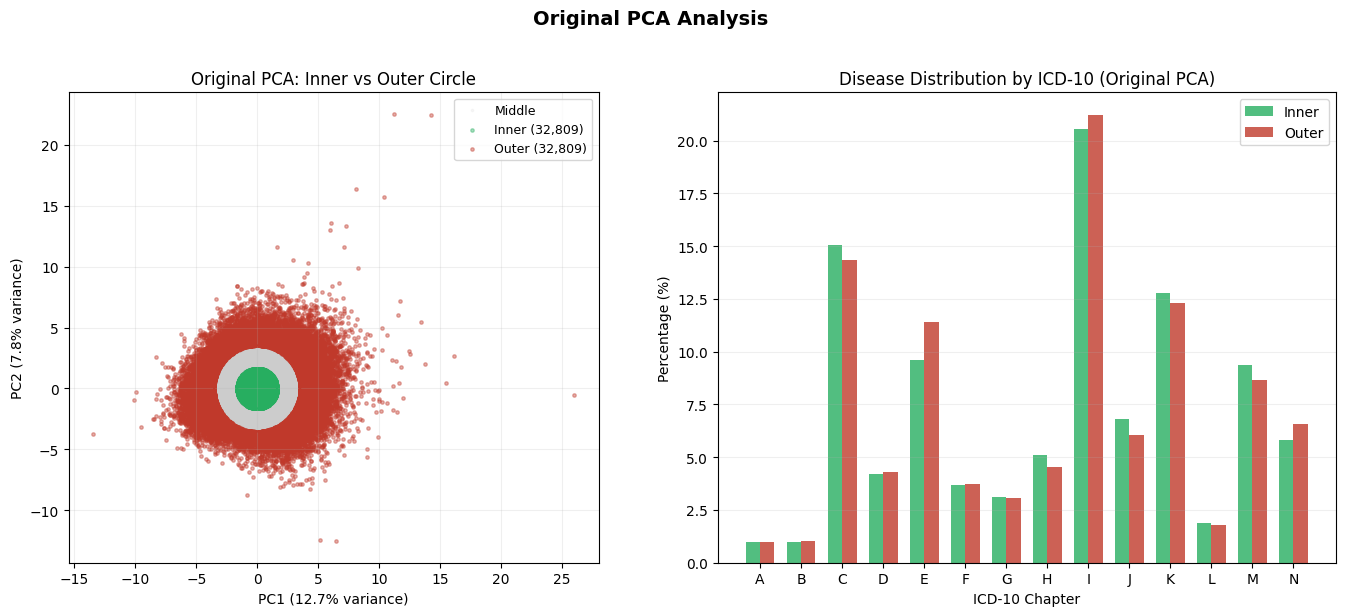

In [24]:
# Visualization: Original PCA - Inner vs Outer with Disease Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: PCA with inner/outer coloring
ax1 = axes[0]
inner_mask = disease_group['circle_group'] == 'inner'
outer_mask = disease_group['circle_group'] == 'outer'
middle_mask = disease_group['circle_group'] == 'middle'

ax1.scatter(disease_group.loc[middle_mask, 'PC1'], disease_group.loc[middle_mask, 'PC2'], 
           c='#cccccc', alpha=0.15, s=3, label='Middle', rasterized=True)
ax1.scatter(disease_group.loc[inner_mask, 'PC1'], disease_group.loc[inner_mask, 'PC2'], 
           c='#27ae60', alpha=0.4, s=6, label=f'Inner ({inner_mask.sum():,})', rasterized=True)
ax1.scatter(disease_group.loc[outer_mask, 'PC1'], disease_group.loc[outer_mask, 'PC2'], 
           c='#c0392b', alpha=0.4, s=6, label=f'Outer ({outer_mask.sum():,})', rasterized=True)

theta = np.linspace(0, 2*np.pi, 100)
ax1.plot(inner_threshold * np.cos(theta), inner_threshold * np.sin(theta), '--', color='#27ae60', lw=1.5)
ax1.plot(outer_threshold * np.cos(theta), outer_threshold * np.sin(theta), '--', color='#c0392b', lw=1.5)

ax1.set_xlabel(f'PC1 ({explained_variance_ratio[0]:.1%} variance)')
ax1.set_ylabel(f'PC2 ({explained_variance_ratio[1]:.1%} variance)')
ax1.set_title('Original PCA: Inner vs Outer Circle')
ax1.legend(loc='upper right', fontsize=9)
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.2)

# Plot 2: Bar chart - Disease Distribution by ICD-10
ax2 = axes[1]
plot_df = comparison_df.sort_values('Letter')
x = np.arange(len(plot_df))
width = 0.35

ax2.bar(x - width/2, plot_df['Inner_Pct'], width, label='Inner', color='#27ae60', alpha=0.8)
ax2.bar(x + width/2, plot_df['Outer_Pct'], width, label='Outer', color='#c0392b', alpha=0.8)
ax2.set_xticks(x)
ax2.set_xticklabels(plot_df['Letter'])
ax2.set_xlabel('ICD-10 Chapter')
ax2.set_ylabel('Percentage (%)')
ax2.set_title('Disease Distribution by ICD-10 (Original PCA)')
ax2.legend()
ax2.grid(True, alpha=0.2, axis='y')

plt.suptitle('Original PCA Analysis', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


In [25]:
# ============== AUGMENTED PCA ANALYSIS ==============
# Use axis-based percentiles with dead zone (same population sizes as original PCA)

# Add augmented PCA coordinates
healthy_biochemistry_df_aug = healthy_biochemistry_df.copy()
healthy_biochemistry_df_aug['PC1_aug'] = X_pca_aug[:, 0]
healthy_biochemistry_df_aug['PC2_aug'] = X_pca_aug[:, 1]

# Filter to blood_before_hospital group
disease_group_aug = healthy_biochemistry_df_aug[
    healthy_biochemistry_df_aug['healthy_approach'] == 'blood_before_hospital'
].copy()

# Calculate percentile thresholds for each axis
# Inner box: 25th-75th on both axes (gives ~25% of patients)
pc1_25 = np.percentile(disease_group_aug['PC1_aug'], 25)
pc1_75 = np.percentile(disease_group_aug['PC1_aug'], 75)
pc2_25 = np.percentile(disease_group_aug['PC2_aug'], 25)
pc2_75 = np.percentile(disease_group_aug['PC2_aug'], 75)

# Outer box: beyond 10th-90th on EITHER axis (gives ~25% of patients)
# P(outside on at least one axis) ≈ 1 - P(inside on both) = 1 - 0.8*0.8 = 0.36, adjust to ~25%
pc1_10 = np.percentile(disease_group_aug['PC1_aug'], 10)
pc1_90 = np.percentile(disease_group_aug['PC1_aug'], 90)
pc2_10 = np.percentile(disease_group_aug['PC2_aug'], 10)
pc2_90 = np.percentile(disease_group_aug['PC2_aug'], 90)

# Inner: BOTH PC1 and PC2 are within 25th-75th percentile (center box)
inner_condition = (
    (disease_group_aug['PC1_aug'] >= pc1_25) & (disease_group_aug['PC1_aug'] <= pc1_75) &
    (disease_group_aug['PC2_aug'] >= pc2_25) & (disease_group_aug['PC2_aug'] <= pc2_75)
)

# Outer: EITHER PC1 or PC2 is in the extreme tails (beyond 10th-90th range)
outer_condition = (
    (disease_group_aug['PC1_aug'] < pc1_10) | (disease_group_aug['PC1_aug'] > pc1_90) |
    (disease_group_aug['PC2_aug'] < pc2_10) | (disease_group_aug['PC2_aug'] > pc2_90)
)

# Middle: everything else (dead zone)
disease_group_aug['circle_group'] = 'middle'
disease_group_aug.loc[inner_condition, 'circle_group'] = 'inner'
disease_group_aug.loc[outer_condition, 'circle_group'] = 'outer'

# Store thresholds for visualization
aug_bounds = {
    'pc1_25': pc1_25, 'pc1_75': pc1_75, 'pc2_25': pc2_25, 'pc2_75': pc2_75,
    'pc1_10': pc1_10, 'pc1_90': pc1_90, 'pc2_10': pc2_10, 'pc2_90': pc2_90
}

# Get patient IDs for each group
inner_patients_aug = set(disease_group_aug[disease_group_aug['circle_group'] == 'inner']['Participant ID'])
outer_patients_aug = set(disease_group_aug[disease_group_aug['circle_group'] == 'outer']['Participant ID'])
middle_patients_aug = set(disease_group_aug[disease_group_aug['circle_group'] == 'middle']['Participant ID'])

# Get HESIN records for augmented groups
hesin_inner_aug = data_hesin_filtered[data_hesin_filtered['eid'].isin(inner_patients_aug)]
hesin_outer_aug = data_hesin_filtered[data_hesin_filtered['eid'].isin(outer_patients_aug)]

# Count ICD-10 letters for augmented groups
inner_counts_aug = hesin_inner_aug['icd10_letter'].value_counts()
outer_counts_aug = hesin_outer_aug['icd10_letter'].value_counts()

# Build comparison dataframe for augmented
comparison_df_aug = pd.DataFrame({
    'Letter': INCLUDED_ICD10_LETTERS,
    'Chapter': [ICD10_CHAPTERS[l] for l in INCLUDED_ICD10_LETTERS],
    'Inner_Count': [inner_counts_aug.get(l, 0) for l in INCLUDED_ICD10_LETTERS],
    'Outer_Count': [outer_counts_aug.get(l, 0) for l in INCLUDED_ICD10_LETTERS],
})
comparison_df_aug['Inner_Pct'] = 100 * comparison_df_aug['Inner_Count'] / comparison_df_aug['Inner_Count'].sum()
comparison_df_aug['Outer_Pct'] = 100 * comparison_df_aug['Outer_Count'] / comparison_df_aug['Outer_Count'].sum()

print(f"Augmented PCA (axis-based with dead zone):")
print(f"  Inner (within 25-75th box): {len(inner_patients_aug):,} patients ({100*len(inner_patients_aug)/len(disease_group_aug):.1f}%)")
print(f"  Middle (dead zone): {len(middle_patients_aug):,} patients ({100*len(middle_patients_aug)/len(disease_group_aug):.1f}%)")
print(f"  Outer (beyond 10-90th): {len(outer_patients_aug):,} patients ({100*len(outer_patients_aug)/len(disease_group_aug):.1f}%)")


Augmented PCA (axis-based with dead zone):
  Inner (within 25-75th box): 33,344 patients (25.4%)
  Middle (dead zone): 51,201 patients (39.0%)
  Outer (beyond 10-90th): 46,689 patients (35.6%)


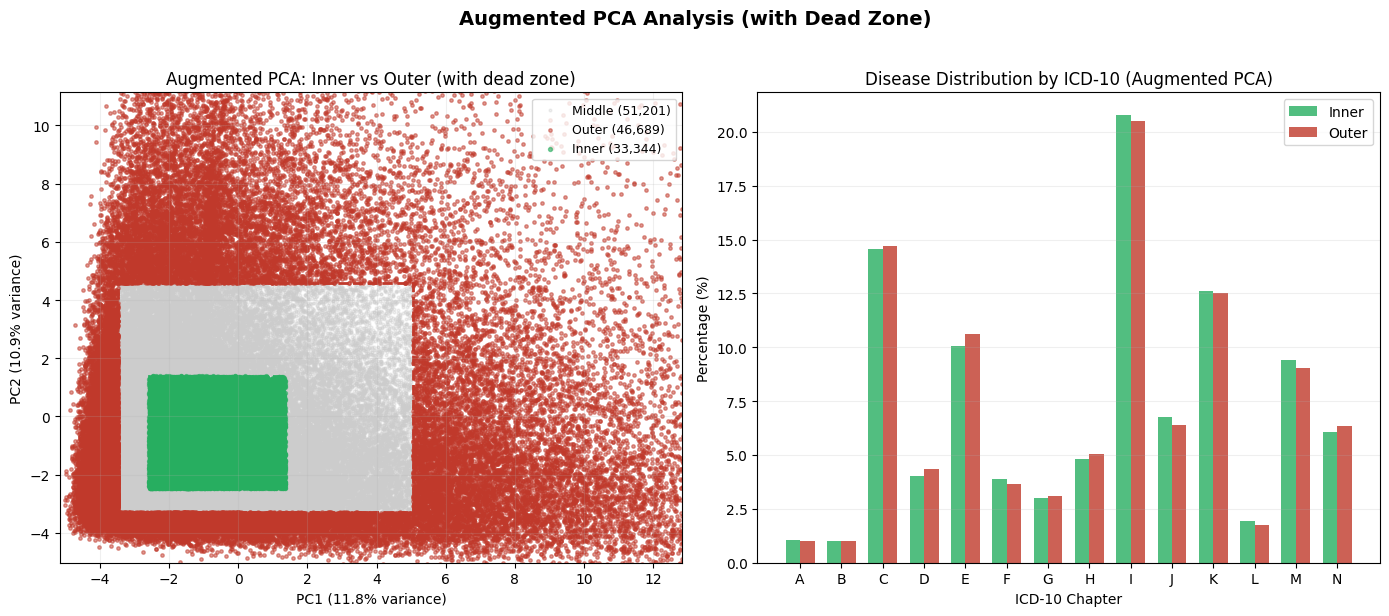

In [26]:
# Visualization: Augmented PCA - Inner vs Outer with Disease Distribution (with dead zone)
from matplotlib.patches import Rectangle

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Augmented PCA with inner/middle/outer coloring
ax1 = axes[0]
inner_mask_aug = disease_group_aug['circle_group'] == 'inner'
outer_mask_aug = disease_group_aug['circle_group'] == 'outer'
middle_mask_aug = disease_group_aug['circle_group'] == 'middle'

# Plot middle first (gray), then outer (red), then inner on top (green)
ax1.scatter(disease_group_aug.loc[middle_mask_aug, 'PC1_aug'], disease_group_aug.loc[middle_mask_aug, 'PC2_aug'], 
           c='#cccccc', alpha=0.3, s=4, label=f'Middle ({middle_mask_aug.sum():,})', rasterized=True)
ax1.scatter(disease_group_aug.loc[outer_mask_aug, 'PC1_aug'], disease_group_aug.loc[outer_mask_aug, 'PC2_aug'], 
           c='#c0392b', alpha=0.5, s=6, label=f'Outer ({outer_mask_aug.sum():,})', rasterized=True)
ax1.scatter(disease_group_aug.loc[inner_mask_aug, 'PC1_aug'], disease_group_aug.loc[inner_mask_aug, 'PC2_aug'], 
           c='#27ae60', alpha=0.6, s=8, label=f'Inner ({inner_mask_aug.sum():,})', rasterized=True)

# Draw inner rectangle (25th-75th percentile box)
rect_inner = Rectangle((aug_bounds['pc1_25'], aug_bounds['pc2_25']), 
                        aug_bounds['pc1_75'] - aug_bounds['pc1_25'],
                        aug_bounds['pc2_75'] - aug_bounds['pc2_25'],
                        fill=False, edgecolor='#27ae60', linewidth=2, linestyle='--')
ax1.add_patch(rect_inner)

# Draw outer rectangle (10th-90th percentile box)
rect_outer = Rectangle((aug_bounds['pc1_10'], aug_bounds['pc2_10']), 
                        aug_bounds['pc1_90'] - aug_bounds['pc1_10'],
                        aug_bounds['pc2_90'] - aug_bounds['pc2_10'],
                        fill=False, edgecolor='#c0392b', linewidth=2, linestyle='--')
ax1.add_patch(rect_outer)

ax1.set_xlabel(f'PC1 ({explained_variance_ratio_aug[0]:.1%} variance)')
ax1.set_ylabel(f'PC2 ({explained_variance_ratio_aug[1]:.1%} variance)')
ax1.set_title('Augmented PCA: Inner vs Outer (with dead zone)')
ax1.legend(loc='upper right', fontsize=9)
ax1.grid(True, alpha=0.2)

# Zoom to show main distribution (clip outliers for better visualization)
pc1_clip = np.percentile(disease_group_aug['PC1_aug'], [2, 98])
pc2_clip = np.percentile(disease_group_aug['PC2_aug'], [2, 98])
ax1.set_xlim(pc1_clip[0] - 1, pc1_clip[1] + 1)
ax1.set_ylim(pc2_clip[0] - 1, pc2_clip[1] + 1)

# Plot 2: Bar chart - Disease Distribution by ICD-10 (Augmented)
ax2 = axes[1]
plot_df_aug = comparison_df_aug.sort_values('Letter')
x = np.arange(len(plot_df_aug))
width = 0.35

ax2.bar(x - width/2, plot_df_aug['Inner_Pct'], width, label='Inner', color='#27ae60', alpha=0.8)
ax2.bar(x + width/2, plot_df_aug['Outer_Pct'], width, label='Outer', color='#c0392b', alpha=0.8)
ax2.set_xticks(x)
ax2.set_xticklabels(plot_df_aug['Letter'])
ax2.set_xlabel('ICD-10 Chapter')
ax2.set_ylabel('Percentage (%)')
ax2.set_title('Disease Distribution by ICD-10 (Augmented PCA)')
ax2.legend()
ax2.grid(True, alpha=0.2, axis='y')

plt.suptitle('Augmented PCA Analysis (with Dead Zone)', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()
